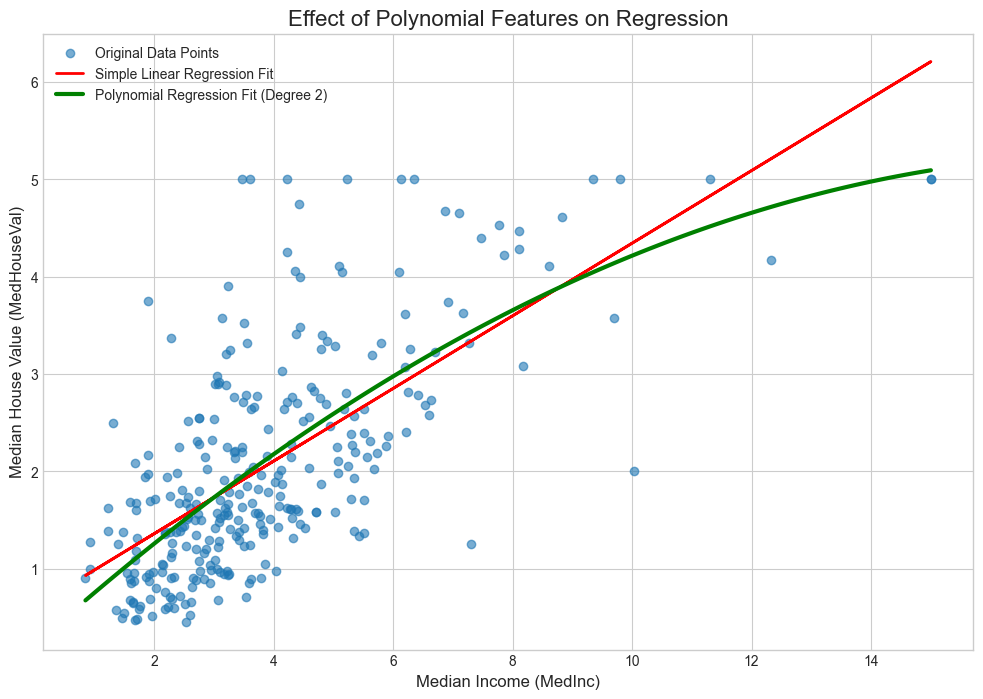

DataFrame with original 'MedInc' and new polynomial features:
       MedInc  MedInc   MedInc^2  MedHouseVal
20046  1.6812  1.6812   2.826433      0.47700
3024   2.5313  2.5313   6.407480      0.45800
15663  3.4801  3.4801  12.111096      5.00001
20484  5.7376  5.7376  32.920054      2.18600
9814   3.7250  3.7250  13.875625      2.78000


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# --- When to Use Polynomial Features ---
# Polynomial Features is a data preprocessing technique used to create non-linear relationships
# from linear ones. It's most useful when you suspect that the relationship between your
# features and the target variable is not linear, but you want to continue using a
# linear model (like Linear Regression). By adding polynomial terms (e.g., x^2, x^3, x*y),
# a linear model can fit more complex, curved patterns in the data.

# --- Data Requirements ---
# This technique requires the input data to be numerical. It is sensitive to the scale
# of the features, so it's often a good practice to scale your data (e.g., using
# StandardScaler or MinMaxScaler) before applying Polynomial Features, especially for
# higher-degree polynomials.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We'll use the California Housing dataset, which is a great example for regression tasks.
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# For this demonstration, we'll focus on the relationship between
# 'MedInc' (Median Income) and the target 'MedHouseVal' (Median House Value).
# We'll use a subset of the data to make the visualization clearer.
df_subset = df.sample(n=300, random_state=42)

# 2. SELECT A FEATURE TO WORK WITH
# We will apply the transformation to the 'MedInc' feature.
X = df_subset[['MedInc']]
y = df_subset['MedHouseVal']

# 3. APPLY POLYNOMIAL FEATURES
# We will create polynomial features of degree 2. This will transform our
# single feature 'MedInc' (x) into three features:
# 1 (the bias term), MedInc (x^1), and MedInc^2 (x^2).
poly = PolynomialFeatures(degree=2, include_bias=False) # include_bias=False to avoid redundant column

# Fit the transformer to our data and transform it
X_poly = poly.fit_transform(X)

# 4. SHOW THE RESULT
# The output is a numpy array. Let's convert it into a pandas DataFrame
# to better understand the result.
poly_features_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['MedInc']))
poly_features_df.index = X.index # Align index with original data

# Add the new polynomial features to our original subset DataFrame
df_subset_poly = pd.concat([df_subset, poly_features_df], axis=1)

# 5. CREATE A BEFORE-AND-AFTER VISUALIZATION
# This visualization will show how a simple linear model fails to capture the curve,
# while a linear model trained on the polynomial features can.

# --- Models for Visualization ---
# a) Simple Linear Regression on original data
model_simple = LinearRegression()
model_simple.fit(X, y)
y_pred_simple = model_simple.predict(X)

# b) Linear Regression on polynomial data
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Generate a range of values for plotting the polynomial regression line
X_plot = np.linspace(X['MedInc'].min(), X['MedInc'].max(), 100).reshape(-1, 1)
# Create a DataFrame with the correct feature name to avoid the UserWarning
X_plot_df = pd.DataFrame(X_plot, columns=['MedInc'])
X_plot_poly = poly.transform(X_plot_df)
y_plot_poly = model_poly.predict(X_plot_poly)


# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of the original data
ax.scatter(X, y, alpha=0.6, label='Original Data Points')

# Plot the simple linear regression line
ax.plot(X, y_pred_simple, color='red', linewidth=2, label='Simple Linear Regression Fit')

# Plot the polynomial regression line
# The X_plot values are already sorted, so we can plot them directly against their predictions.
ax.plot(X_plot, y_plot_poly, color='green', linewidth=3, label='Polynomial Regression Fit (Degree 2)')

ax.set_title('Effect of Polynomial Features on Regression', fontsize=16)
ax.set_xlabel('Median Income (MedInc)', fontsize=12)
ax.set_ylabel('Median House Value (MedHouseVal)', fontsize=12)
ax.legend(fontsize=10)
plt.show()


# 6. PRINT THE HEAD OF THE RESULTING DATAFRAME
# Display the original feature alongside the newly created polynomial features.
print("DataFrame with original 'MedInc' and new polynomial features:")
print(df_subset_poly[['MedInc', 'MedInc^2', 'MedHouseVal']].head())
